In [1]:
from os import listdir
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from PIL import Image
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
def load_photos(directory):
    images = []
    labels1 = []
    labels2 = []
    for name in listdir(directory):
        filename = directory + '/' + name
        # convert image to gray
        #img = Image.open(filename).convert('L')
        #img.save(filename)
        # load an image from file
        image = load_img(filename, target_size=(160, 128))
        # convert the image pixels to a numpy array
        image = img_to_array(image)
        # get image id + labels
        labels1.append(round(float(name.split('_')[0].split('-')[0]), 1))
        labels2.append(round(float(name.split('_')[0].split('-')[1]), 1))
        images.append(image)
    return images, labels1, labels2

In [11]:
# load images from both train and test groups
directory = '../data/Patate_Pics/Training'
images, labels1, labels2 = load_photos(directory)
nb_images = len(images)
print('Loaded Images and labels for training: %d' % nb_images)
directory = '../data/Patate_Pics/Validation'
images_val, labels1_val, labels2_val = load_photos(directory)
nb_images_val = len(images_val)
print('Loaded Images and labels for validation: %d' % nb_images_val)

Loaded Images and labels for training: 896
Loaded Images and labels for validation: 150


In [12]:
#normalise datas
images = np.array(images)
images /= 255
images_val = np.array(images_val)
images_val /= 255

In [13]:
#convert to np.array
labels1 = np.array(labels1)
labels2 = np.array(labels2)
labels1_val = np.array(labels1_val)
labels2_val = np.array(labels2_val)

In [14]:
#convert datas to dummyvalues
labels1d = pd.get_dummies(labels1)
labels2d = pd.get_dummies(labels2)

In [15]:
labels1d.shape, labels2d.shape
labels1d, labels2d

(     0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.0
 0      1    0    0    0    0    0    0    0    0
 1      0    1    0    0    0    0    0    0    0
 2      0    1    0    0    0    0    0    0    0
 3      0    1    0    0    0    0    0    0    0
 4      0    1    0    0    0    0    0    0    0
 5      0    1    0    0    0    0    0    0    0
 6      0    1    0    0    0    0    0    0    0
 7      0    0    1    0    0    0    0    0    0
 8      0    0    1    0    0    0    0    0    0
 9      0    0    1    0    0    0    0    0    0
 10     0    0    1    0    0    0    0    0    0
 11     0    0    1    0    0    0    0    0    0
 12     0    0    1    0    0    0    0    0    0
 13     0    0    0    1    0    0    0    0    0
 14     0    0    0    1    0    0    0    0    0
 15     0    0    0    1    0    0    0    0    0
 16     0    0    0    1    0    0    0    0    0
 17     0    0    0    1    0    0    0    0    0
 18     0    0    0    1    0    0    0    0    0


In [16]:
#append empty columns
labels1d.insert(0, column='0.1', value=0, allow_duplicates=False)
labels2d.insert(0, column='0.2', value=0, allow_duplicates=False)
labels2d.insert(0, column='0.1', value=0, allow_duplicates=False)

labels1d, labels2d

(     0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.0
 0      0    1    0    0    0    0    0    0    0    0
 1      0    0    1    0    0    0    0    0    0    0
 2      0    0    1    0    0    0    0    0    0    0
 3      0    0    1    0    0    0    0    0    0    0
 4      0    0    1    0    0    0    0    0    0    0
 5      0    0    1    0    0    0    0    0    0    0
 6      0    0    1    0    0    0    0    0    0    0
 7      0    0    0    1    0    0    0    0    0    0
 8      0    0    0    1    0    0    0    0    0    0
 9      0    0    0    1    0    0    0    0    0    0
 10     0    0    0    1    0    0    0    0    0    0
 11     0    0    0    1    0    0    0    0    0    0
 12     0    0    0    1    0    0    0    0    0    0
 13     0    0    0    0    1    0    0    0    0    0
 14     0    0    0    0    1    0    0    0    0    0
 15     0    0    0    0    1    0    0    0    0    0
 16     0    0    0    0    1    0    0    0    0    0
 17     0 

In [17]:
#convert to np.array again
labels1d = np.array(labels1d)
labels2d = np.array(labels2d)

In [18]:
#check if OK
labels1[1], labels1d[1]

(0.29999999999999999, array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64))

In [19]:
from keras.models import Model
from keras.layers import *
import keras.backend as K
import keras.optimizers as Optimizers

In [20]:
K.clear_session()

img_in = Input(shape=(160, 128, 3), name='img_in')

x = img_in

x = Conv2D(8, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(16, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

flat = Flatten()(x)

out1 = Dense(10, activation='softmax')(flat)
out2 = Dense(10, activation='softmax')(flat)

model = Model(inputs=[img_in], outputs=[out1, out2])
model.compile(loss=['categorical_crossentropy', 'categorical_crossentropy'], optimizer='adadelta', metrics=['accuracy'])

In [21]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
img_in (InputLayer)              (None, 160, 128, 3)   0                                            
____________________________________________________________________________________________________
conv2d_1 (Conv2D)                (None, 160, 128, 8)   224         img_in[0][0]                     
____________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)   (None, 80, 64, 8)     0           conv2d_1[0][0]                   
____________________________________________________________________________________________________
conv2d_2 (Conv2D)                (None, 80, 64, 16)    1168        max_pooling2d_1[0][0]            
___________________________________________________________________________________________

In [22]:
h = model.fit(images, [labels1d, labels2d], batch_size=1, epochs=50, verbose=1)

Epoch 1/50
896/896 [==============================] - 14s - loss: 3.3762 - dense_1_loss: 1.6138 - dense_2_loss: 1.7624 - dense_1_acc: 0.3069 - dense_2_acc: 0.3114    
Epoch 2/50
896/896 [==============================] - 13s - loss: 3.2852 - dense_1_loss: 1.5644 - dense_2_loss: 1.7208 - dense_1_acc: 0.3482 - dense_2_acc: 0.2935    
Epoch 3/50
896/896 [==============================] - 14s - loss: 3.2423 - dense_1_loss: 1.5594 - dense_2_loss: 1.6829 - dense_1_acc: 0.3382 - dense_2_acc: 0.3348    
Epoch 4/50
896/896 [==============================] - 13s - loss: 3.1463 - dense_1_loss: 1.5228 - dense_2_loss: 1.6235 - dense_1_acc: 0.3516 - dense_2_acc: 0.3471    
Epoch 5/50
896/896 [==============================] - 14s - loss: 3.0819 - dense_1_loss: 1.5096 - dense_2_loss: 1.5723 - dense_1_acc: 0.3951 - dense_2_acc: 0.3750    
Epoch 6/50
896/896 [==============================] - 14s - loss: 3.0178 - dense_1_loss: 1.4817 - dense_2_loss: 1.5360 - dense_1_acc: 0.3973 - dense_2_acc: 0.3917   

896/896 [==============================] - 16s - loss: 0.0040 - dense_1_loss: 0.0030 - dense_2_loss: 0.0010 - dense_1_acc: 0.9978 - dense_2_acc: 1.0000    
Epoch 50/50
896/896 [==============================] - 16s - loss: 0.0068 - dense_1_loss: 0.0050 - dense_2_loss: 0.0019 - dense_1_acc: 0.9989 - dense_2_acc: 1.0000    


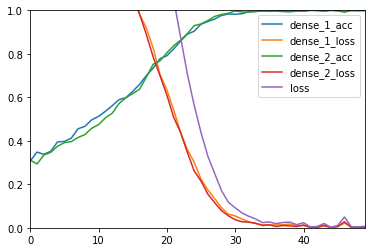

In [23]:
#print History graph
historydf = pd.DataFrame(h.history, index=h.epoch)
historydf.plot(ylim=(0,1))

In [24]:
# Get predictions
all_preds = model.predict(images_val)

# Check predictions
idx1 = np.argmax(all_preds[0], axis=1)
idx2 = np.argmax(all_preds[1], axis=1)

i = 0
for value1 in idx1:
    idx1[i] = value1 + 1
    i = i + 1
i = 0
for value2 in idx2:
    idx2[i] = value2 + 1
    i = i + 1

idx1, labels2_val, idx2, labels1_val

(array([ 8,  8,  9,  6,  9,  8,  6,  7,  6,  7,  6,  8,  7,  6,  6,  6,  7,
         6,  5,  8,  6,  7,  6,  7,  6,  8,  7,  8,  7,  7,  7,  8,  8,  7,
         7, 10,  7,  7,  9,  8,  7,  7,  7,  7,  6,  7,  7,  7,  7,  7,  8,
         7,  6,  6,  7,  9,  7,  7,  6,  7,  7,  6,  7,  6,  5,  7,  8,  8,
         6,  6,  8,  7,  7,  9,  7,  7,  6,  8,  7,  5,  8,  9,  7,  8,  7,
         7,  8,  8,  8,  8,  8,  8,  7,  7,  7,  8,  7,  7, 10,  6,  7,  7,
         8,  8,  8,  7,  8,  7,  5,  8,  7,  9,  8,  8,  7,  8,  7,  8,  8,
         6,  8,  8,  8,  6,  9,  7,  9,  8,  9,  7,  8,  9,  8,  8,  8,  8,
         8,  8,  7,  8,  9,  9,  7,  7,  8,  7,  9,  5,  7,  8], dtype=int64),
 array([ 0.3,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.6,  0.6,  0.6,  0.6,
         0.6,  0.7,  0.7,  0.7,  0.6,  0.6,  0.6,  0.7,  0.7,  0.6,  0.6,
         0.7,  0.7,  0.7,  0.4,  0.5,  0.5,  0.6,  0.6,  0.8,  0.8,  0.8,
         0.8,  0.8,  0.6,  0.6,  0.7,  0.7,  0.7,  0.3,  0.5,  0.6,  0.7,
         0.7,  0.

In [25]:
predicted_ratio = []
label_ratio = []
se = 0
i = 0
for value in idx1:
    predicted_ratio.append(value / idx2[i])
    label_ratio.append(labels1_val[i] / labels2_val[i])
    se += ((predicted_ratio[i]-label_ratio[i])*(predicted_ratio[i]-label_ratio[i]))
    i = i + 1
mse = se/nb_images_val
mse

0.05117115877215081

In [26]:
model.save('test_model.h5')

In [ ]:
from keras.models import load_model
model = load_model('test_model.h5')